In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os



In [48]:

# Define path to CSV files
path = './'

# Identify all CSV files
all_files = glob.glob(os.path.join(path, "*.csv"))

# Merge all CSV files into one DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

#print(df)
display(df)

,txn_type,txn_date,txn_time,start_location,end_location,line_name,start_zone,end_zone
0,Check out,2023-12-03,12:57:44,NaN,Sobha Realty Metro Station,Red Metro Line,Zone 2,Zone 2
1,Check out,2023-12-03,19:14:01,NaN,UAE Exchange Metro Station,Red Metro Line,Zone 1,Zone 1
2,Check out,2023-12-03,13:18:37,NaN,Al Ghubaiba Metro Station,Green Metro Line,Zone 6,Zone 6
3,Check out,2023-12-02,23:50:07,NaN,The Gardens Metro Station,Red Metro Line,Zone 2,Zone 2
4,Check in,2023-12-03,09:49:16,NaN,Al Ghubaiba Metro Station,Green Metro Line,Zone 6,Zone 6
...,...,...,...,...,...,...,...,...
10481635,Check in,2024-02-03,12:10:57,Airport Terminal 1 Metro Station,Airport Terminal 1 Metro Station,Red Metro Line,Zone 5,Zone 5
10481636,Check in,2024-02-03,06:56:36,Stadium Metro Station,Stadium Metro Station,Green Metro Line,Zone 5,Zone 5
10481637,Check in,2024-02-03,17:52:18,Airport Terminal 1 Metro Station,Airport Terminal 1 Metro Station,Red Metro Line,Zone 5,Zone 5
10481638,Check in,2024-02-03,17:27:35,Stadium Metro Station,Stadium Metro Station,Green Metro Line,Zone 5,Zone 5


In [49]:
df.to_csv('Total_dataset.csv',index=False)

In [25]:
df_total = pd.read_csv('Total_dataset.csv')
display(df_total)

,txn_type,txn_date,txn_time,start_location,end_location,line_name,start_zone,end_zone
0,Check out,2023-12-03,12:57:44,NaN,Sobha Realty Metro Station,Red Metro Line,Zone 2,Zone 2
1,Check out,2023-12-03,19:14:01,NaN,UAE Exchange Metro Station,Red Metro Line,Zone 1,Zone 1
2,Check out,2023-12-03,13:18:37,NaN,Al Ghubaiba Metro Station,Green Metro Line,Zone 6,Zone 6
3,Check out,2023-12-02,23:50:07,NaN,The Gardens Metro Station,Red Metro Line,Zone 2,Zone 2
4,Check in,2023-12-03,09:49:16,NaN,Al Ghubaiba Metro Station,Green Metro Line,Zone 6,Zone 6
...,...,...,...,...,...,...,...,...
10481635,Check in,2024-02-03,12:10:57,Airport Terminal 1 Metro Station,Airport Terminal 1 Metro Station,Red Metro Line,Zone 5,Zone 5
10481636,Check in,2024-02-03,06:56:36,Stadium Metro Station,Stadium Metro Station,Green Metro Line,Zone 5,Zone 5
10481637,Check in,2024-02-03,17:52:18,Airport Terminal 1 Metro Station,Airport Terminal 1 Metro Station,Red Metro Line,Zone 5,Zone 5
10481638,Check in,2024-02-03,17:27:35,Stadium Metro Station,Stadium Metro Station,Green Metro Line,Zone 5,Zone 5


In [26]:
df_total.info()
df_total.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10481640 entries, 0 to 10481639
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   txn_type        object
 1   txn_date        object
 2   txn_time        object
 3   start_location  object
 4   end_location    object
 5   line_name       object
 6   start_zone      object
 7   end_zone        object
dtypes: object(8)
memory usage: 639.7+ MB


,txn_type,txn_date,txn_time,start_location,end_location,line_name,start_zone,end_zone
count,10481640,10481640,10481640,4781872,10481101,10481101,10481101,10481101
unique,2,34,73237,53,53,2,5,5
top,Check in,2024-01-25,18:25:00,BurJuman Metro Station,BurJuman Metro Station,Red Metro Line,Zone 5,Zone 5
freq,5245999,913065,376,268473,551111,7554969,3954278,3954278


In [27]:
df_total.isnull().sum()

txn_type                0
txn_date                0
txn_time                0
start_location    5699768
end_location          539
line_name             539
start_zone            539
end_zone              539
dtype: int64

In [28]:
df_total['start_location'].isnull() == True

0            True
1            True
2            True
3            True
4            True
            ...  
10481635    False
10481636    False
10481637    False
10481638    False
10481639    False
Name: start_location, Length: 10481640, dtype: bool

In [29]:
df_total[df_total['start_location'].isnull() == True]

,txn_type,txn_date,txn_time,start_location,end_location,line_name,start_zone,end_zone
0,Check out,2023-12-03,12:57:44,NaN,Sobha Realty Metro Station,Red Metro Line,Zone 2,Zone 2
1,Check out,2023-12-03,19:14:01,NaN,UAE Exchange Metro Station,Red Metro Line,Zone 1,Zone 1
2,Check out,2023-12-03,13:18:37,NaN,Al Ghubaiba Metro Station,Green Metro Line,Zone 6,Zone 6
3,Check out,2023-12-02,23:50:07,NaN,The Gardens Metro Station,Red Metro Line,Zone 2,Zone 2
4,Check in,2023-12-03,09:49:16,NaN,Al Ghubaiba Metro Station,Green Metro Line,Zone 6,Zone 6
...,...,...,...,...,...,...,...,...
10481401,Check out,2024-02-03,17:33:35,NaN,The Gardens Metro Station,Red Metro Line,Zone 2,Zone 2
10481403,Check out,2024-02-03,12:27:52,NaN,Al Ghubaiba Metro Station,Green Metro Line,Zone 6,Zone 6
10481404,Check out,2024-02-03,14:05:10,NaN,Sobha Realty Metro Station,Red Metro Line,Zone 2,Zone 2
10481405,Check out,2024-02-03,19:59:46,NaN,The Gardens Metro Station,Red Metro Line,Zone 2,Zone 2


In [30]:
df_total[df_total['end_location'].isnull() == True]
df_total = df_total[df_total['end_location'].notnull()]
df_total.isnull().sum()

txn_type                0
txn_date                0
txn_time                0
start_location    5699229
end_location            0
line_name               0
start_zone              0
end_zone                0
dtype: int64

C:\Users\ibrum\AppData\Local\Temp\ipykernel_26616\1518134160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check_in['txn_date'] = pd.to_datetime(df_check_in['txn_date'])
C:\Users\ibrum\AppData\Local\Temp\ipykernel_26616\1518134160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check_in['hour_of_day'] = df_check_in['txn_time'].apply(lambda x: int(x.split(':')[0]))
C:\Users\ibrum\AppData\Local\Temp\ipykernel_26616\1518134160.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

Predictions for check-ins using Decision Tree:
[0 0 0 ... 0 0 0]
Accuracy for Decision Tree: 0.8339647871629151
Accuracy for Logistic Regression: 0.8415422331178961


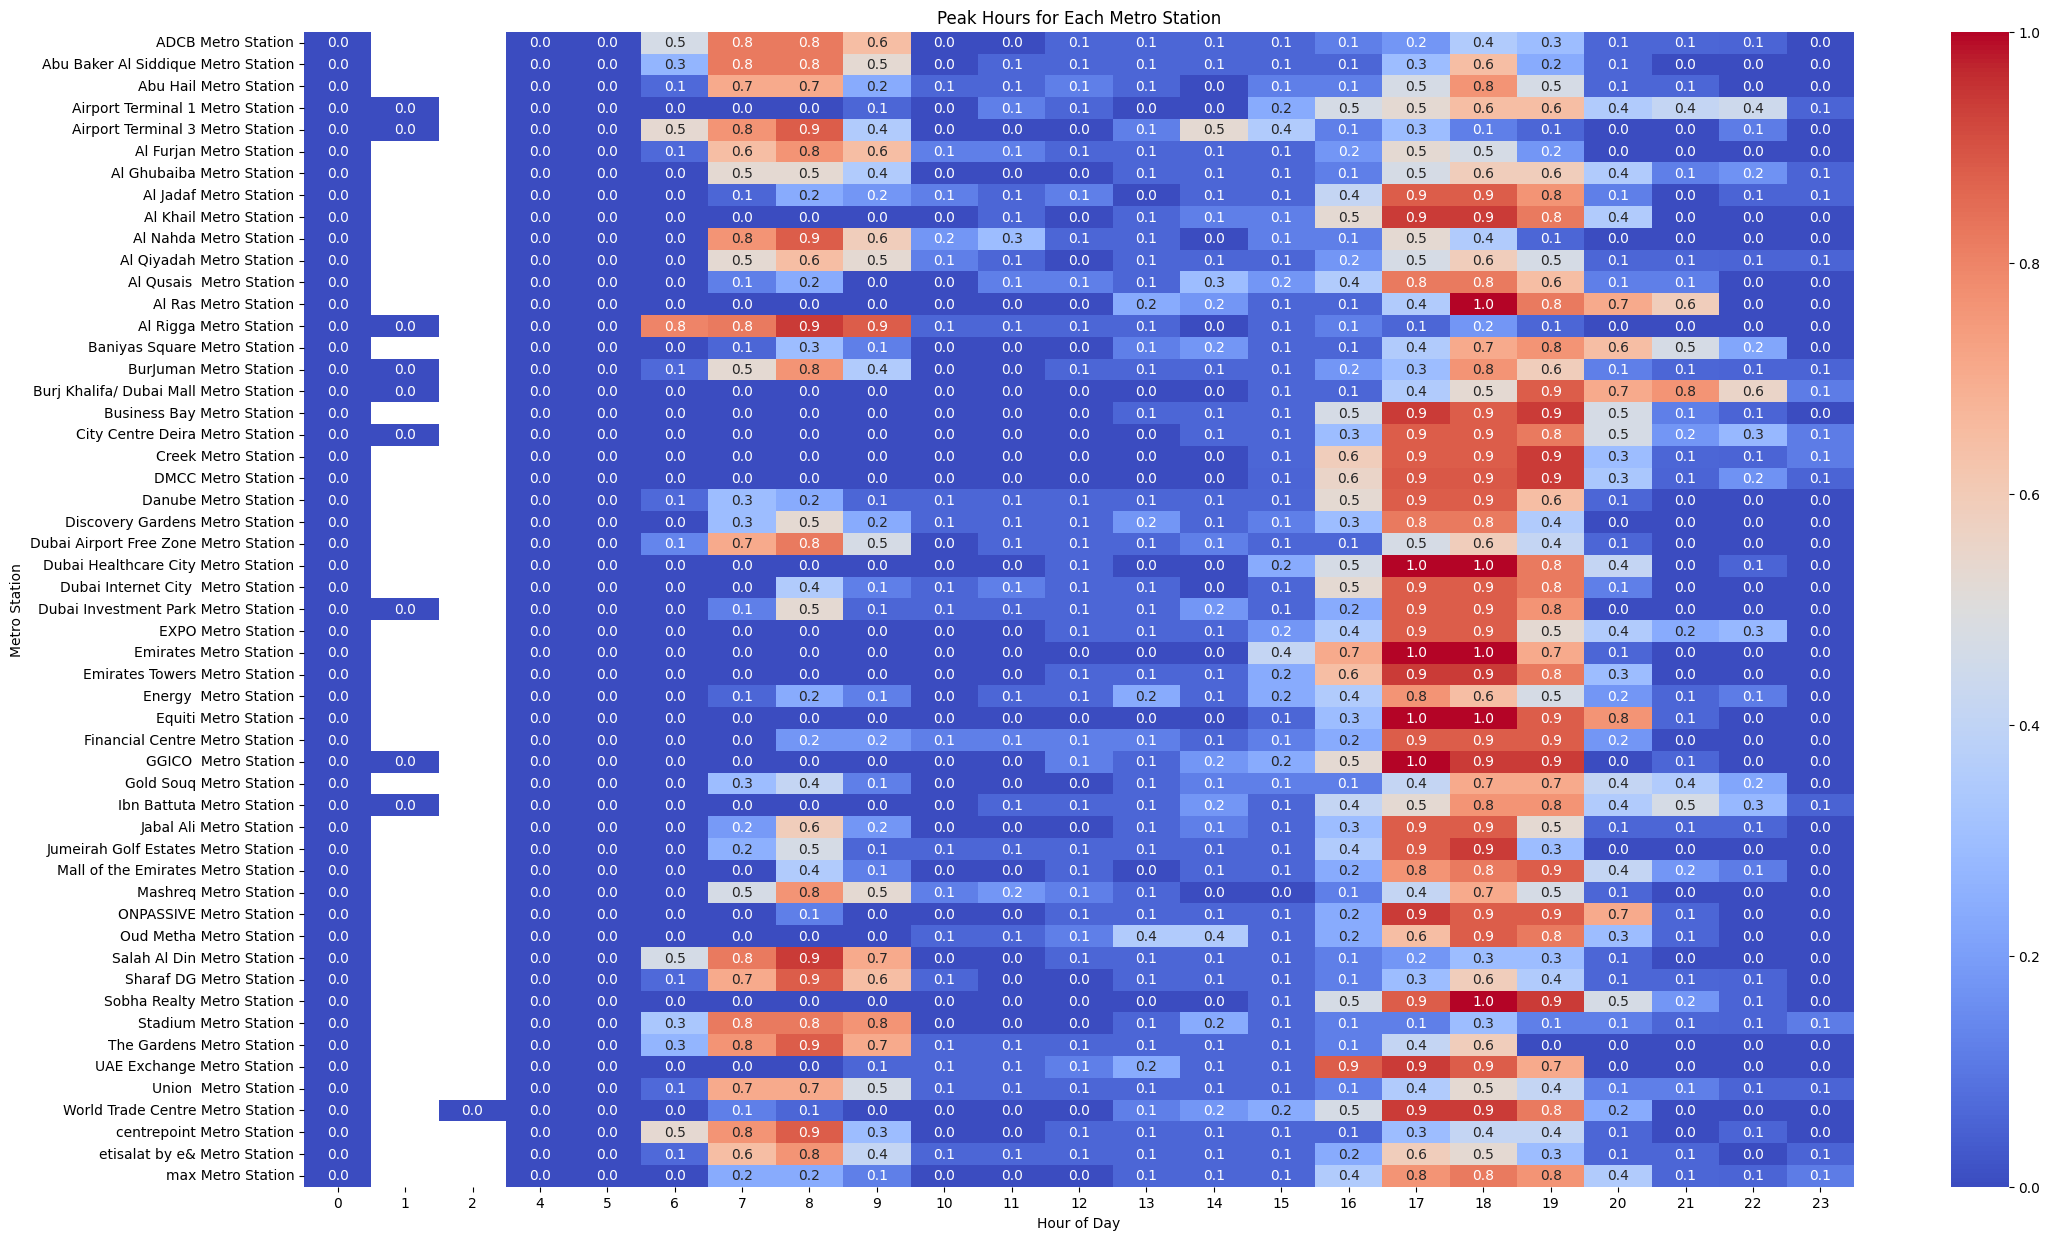

In [31]:
# Separate check-ins
df_check_in = df_total[df_total['txn_type'] == 'Check in']
df_check_in['txn_date'] = pd.to_datetime(df_check_in['txn_date'])
df_check_in['hour_of_day'] = df_check_in['txn_time'].apply(lambda x: int(x.split(':')[0]))
df_check_in['day_of_week'] = df_check_in['txn_date'].dt.dayofweek

# Group by start_location, txn_date, hour_of_day, and day_of_week to get hourly check-ins
checkin_perHour_perStation = df_check_in.groupby(['start_location', 'txn_date', 'hour_of_day', 'day_of_week']).size().reset_index(name='checkins_count')

# Sort the data by start_location, txn_date, and hour_of_day
checkin_perHour_perStation = checkin_perHour_perStation.sort_values(by=['start_location', 'txn_date', 'hour_of_day'])

# Calculate the threshold dynamically for each start_location and day_of_week
threshold = checkin_perHour_perStation.groupby(['start_location', 'day_of_week'])['checkins_count'].quantile(0.80).reset_index(name='threshold')

# Merge the threshold back to the checkin_perHour_perStation DataFrame
checkin_perHour_perStation = checkin_perHour_perStation.merge(threshold, on=['start_location', 'day_of_week'])

# Define peak hour based on the threshold
checkin_perHour_perStation['is_peak_hour'] = (checkin_perHour_perStation['checkins_count'] > checkin_perHour_perStation['threshold']).astype(int)

# Prepare final dataset for check-ins
checkIn_X = checkin_perHour_perStation[['hour_of_day', 'checkins_count', 'day_of_week']]
checkIn_Y = checkin_perHour_perStation['is_peak_hour']

# Split the data into training and testing sets for check-ins
X_train_checkins, X_test_checkins, y_train_checkins, y_test_checkins = train_test_split(checkIn_X, checkIn_Y, test_size=0.25, random_state=42)

# Initialize and train a Decision Tree Classifier for check-ins
clf_decision_tree = DecisionTreeClassifier(random_state=42)
clf_decision_tree.fit(X_train_checkins, y_train_checkins)

# Initialize and train a Logistic Regression Classifier for check-ins
clf_logistic_regression = LogisticRegression(random_state=42)
clf_logistic_regression.fit(X_train_checkins, y_train_checkins)

# Make predictions for check-ins using Decision Tree
y_pred_decision_tree = clf_decision_tree.predict(X_test_checkins)
print("Predictions for check-ins using Decision Tree:")
print(y_pred_decision_tree)
# Make predictions for check-ins using Logistic Regression
y_pred_logistic_regression = clf_logistic_regression.predict(X_test_checkins)

# Evaluate the classifiers for check-ins
accuracy_decision_tree = accuracy_score(y_test_checkins, y_pred_decision_tree)
accuracy_logistic_regression = accuracy_score(y_test_checkins, y_pred_logistic_regression)

print("Accuracy for Decision Tree:", accuracy_decision_tree)
print("Accuracy for Logistic Regression:", accuracy_logistic_regression)

# Pivot the data to create a heatmap
heatmap_data = checkin_perHour_perStation.pivot_table(index='start_location', columns='hour_of_day', values='is_peak_hour', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Peak Hours for Each Metro Station')
plt.xlabel('Hour of Day')
plt.ylabel('Metro Station')
plt.show()


Accuracy for Ensemble (Bagging): 0.8497882772453755


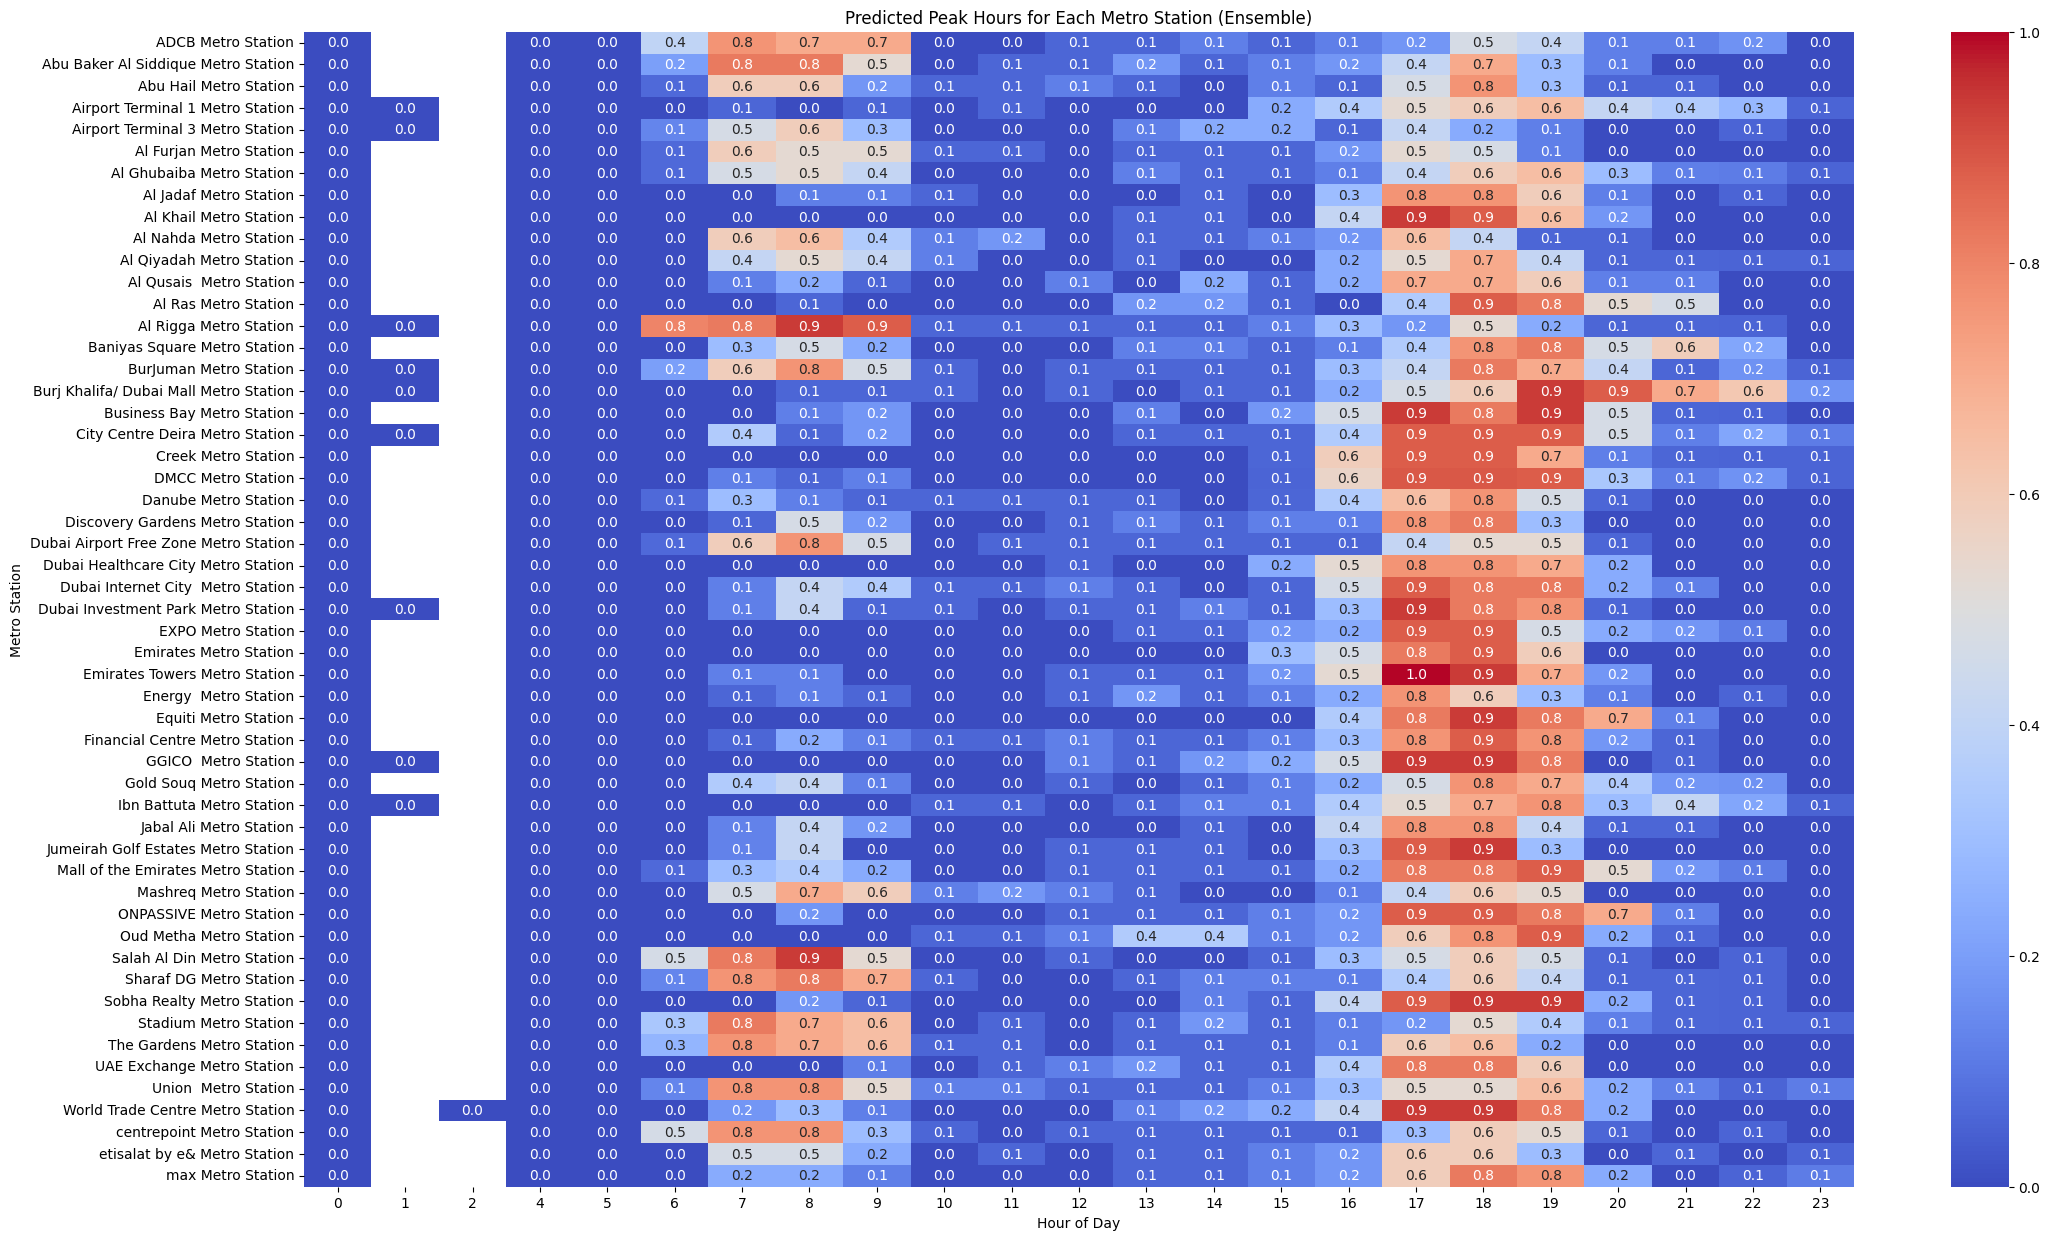

In [32]:
# Number of Decision Trees in the ensemble
num_estimators = 125

# Initialize a list to hold the Decision Tree models
decision_trees_holder = []

# Implement bagging
for _ in range(num_estimators):
    # Create a test sample
    test_sample = np.random.choice(len(X_train_checkins), len(X_train_checkins), replace=True)
    x_sample = X_train_checkins.iloc[test_sample]
    y_sample = y_train_checkins.iloc[test_sample]
    
    # Train a Decision Tree Classifier
    classifier = DecisionTreeClassifier(random_state=42)
    classifier.fit(x_sample, y_sample)
    
    # Add the trained model to the list
    decision_trees_holder.append(classifier)

# Make predictions using the ensemble
def ensemble_predict(X):
    return (np.mean([clf.predict(X) for clf in decision_trees_holder], axis=0) >= 0.5).astype(int)

# Make predictions for check-ins using the ensemble
y_pred_ensemble = ensemble_predict(X_test_checkins)

# Evaluate the ensemble
ensemble_accuracy = accuracy_score(y_test_checkins, y_pred_ensemble)
print("Accuracy for Ensemble (Bagging):", ensemble_accuracy)

# Create a heatmap for the predicted peak hours by the ensemble 0.8234646103001928 -10 0.8286973285596254 0.8342054530432388- 1000 0.8358578903883228- 500
heatmap_data_predicted = checkin_perHour_perStation.copy()
heatmap_data_predicted['predicted_is_peak_hour'] = ensemble_predict(checkIn_X)

heatmap_data_predicted = heatmap_data_predicted.pivot_table(index='start_location', columns='hour_of_day', values='predicted_is_peak_hour', aggfunc='mean')

plt.figure(figsize=(25, 15))
sns.heatmap(heatmap_data_predicted, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Predicted Peak Hours for Each Metro Station (Ensemble)')
plt.xlabel('Hour of Day')
plt.ylabel('Metro Station')
plt.show()

In [37]:

# Number of Logistic Regression models in the ensemble
num_estimators = 125

# Initialize a Logistic Regression model
classifier = LogisticRegression(random_state=42)
reg_hold = []
# Implement bagging
for _ in range(num_estimators):
    # Create a 
    test_sample = np.random.choice(len(X_train_checkins), len(X_train_checkins), replace=True)
    x_sample = X_train_checkins.iloc[test_sample]
    y_sample = y_train_checkins.iloc[test_sample]
    
    # Train the model on the bootstrap sample
    classifier.fit(x_sample, y_sample)

# Make predictions using the ensemble
def ensemble_predict_logistic(X):
    predictions = np.zeros((len(X), num_estimators))
    for _ in range(num_estimators):
        predictions[:, _] = classifier.predict(X)
    return (predictions.sum(axis=1) >= (num_estimators / 2)).astype(int)

# Make predictions for check-ins using the ensemble
y_pred_ensemble_logistic = ensemble_predict_logistic(X_test_checkins)

# Evaluate the ensemble
accuracy_ensemble_logistic = accuracy_score(y_test_checkins, y_pred_ensemble_logistic)
print("Accuracy for Ensemble (Bagging) - Logistic Regression:", accuracy_ensemble_logistic)

Accuracy for Ensemble (Bagging) - Logistic Regression: 0.8415422331178961


In [35]:
'''
# Shuffle the data
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Function to train and test a model on a fold
def train_and_test_model(model, train_df, test_df):
    model.fit(train_df[['hour_of_day', 'checkins_count', 'day_of_week']], train_df['is_peak_hour'])
    y_pred = model.predict(test_df[['hour_of_day', 'checkins_count', 'day_of_week']])
    return accuracy_score(test_df['is_peak_hour'], y_pred)

# Perform 10-fold cross-validation for Decision Tree
dt_accuracies = []
for i in range(10):
    train_df, test_df = train_test_split(df_shuffled, test_size=0.1, random_state=42 + i)
    accuracy = train_and_test_model(DecisionTreeClassifier(random_state=42 + i), train_df, test_df)
    dt_accuracies.append(accuracy)

# Perform 10-fold cross-validation for Logistic Regression
lr_accuracies = []
for i in range(10):
    train_df, test_df = train_test_split(df_shuffled, test_size=0.1, random_state=42 + i)
    accuracy = train_and_test_model(LogisticRegression(random_state=42 + i), train_df, test_df)
    lr_accuracies.append(accuracy)

# Calculate average accuracies
avg_accuracy_dt = np.mean(dt_accuracies)
avg_accuracy_lr = np.mean(lr_accuracies)

# Print the average accuracies
print("Average Accuracy for Decision Tree (10-fold CV):", avg_accuracy_dt)
print("Average Accuracy for Logistic Regression (10-fold CV):", avg_accuracy_lr)

Still a work in progress

'''

KeyError: "['checkins_count'] not in index"